# **Water Quality Hypotheses Testing**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

#### There will be three hypotheses which will cover the following aspects:
* pH levels

* Chloromine

* Turbidity

## Outputs

* The output results will be determined by Shapiro and t-tests





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\water_quality\\water_quality_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\rayaf\\OneDrive\\Documents\\water_quality\\water_quality_analysis'

# Section 1

Section 1 content

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df = pd.read_csv('../water_quality_analysis/data/cleaned_data/water_potability_cleaned.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


### Hypotheses 1

•	Null hypothesis (H₀): There is no difference in pH between potable and non-potable water.

•	Alternative hypothesis (H₁): Potable water has a higher average pH than non-potable water.


In [10]:
ph_potable = df[df['Potability'] == 1]['ph']
ph_non_potable = df[df['Potability'] == 0]['ph']
print(stats.shapiro(ph_potable))
print(stats.shapiro(ph_non_potable))
t_stat, p_value = stats.ttest_ind(ph_potable, ph_non_potable, equal_var=False)

print("t-statistic:", t_stat, "p-value:", p_value)
if p_value < 0.05:
    print("Reject H₀: Higher pH is significantly associated with potability.")
else:
    print("Fail to reject H₀: No significant association found.")



ShapiroResult(statistic=0.9882742931141578, pvalue=4.4133220753171404e-06)
ShapiroResult(statistic=0.9981268724289203, pvalue=0.2032005769853681)
t-statistic: 0.6695253025129594 p-value: 0.5032422274177554
Fail to reject H₀: No significant association found.


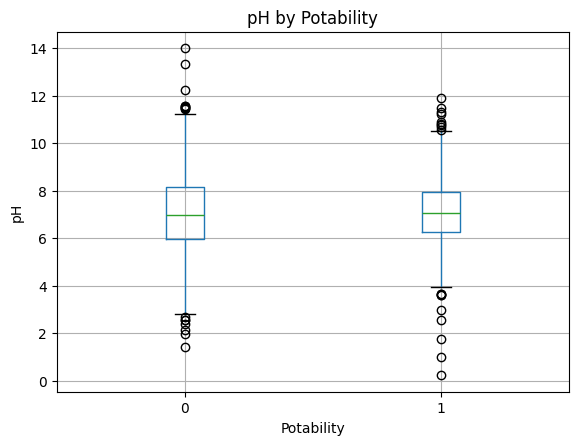

In [11]:
df.boxplot(column='ph', by='Potability')
plt.title("pH by Potability")
plt.suptitle("")
plt.xlabel("Potability")
plt.ylabel("pH")
plt.show()


#### The mean value for potable and non-potable water are about the same, but there are higher outliers in the non-potable water. The WHO recommend a value of no more that 8, otherwise the water will be acidic.

---

### Hypotheses 2

•	Null hypothesis (H₀): There is no difference in Chloramine levels between potable and non-potable water.

•	Alternative hypothesis (H₁): Potable water has higher Chloramines concentrations on average than non-potable water.


In [12]:
chl_potable = df[df['Potability'] == 1]['Chloramines']
chl_non_potable = df[df['Potability'] == 0]['Chloramines']
print(stats.shapiro(chl_potable))
print(stats.shapiro(chl_non_potable))
t_stat, p_value = stats.ttest_ind(chl_potable, chl_non_potable, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_value)
if p_value < 0.05:
    print("Reject H₀: Higher Chloramines are significantly associated with potability.")
else:
    print("Fail to reject H₀: No significant association found.")


ShapiroResult(statistic=0.9952421709356821, pvalue=0.012884134937913138)
ShapiroResult(statistic=0.9968229010455081, pvalue=0.015844139100476797)
t-statistic: 0.9035768834671 p-value: 0.36636037192230153
Fail to reject H₀: No significant association found.


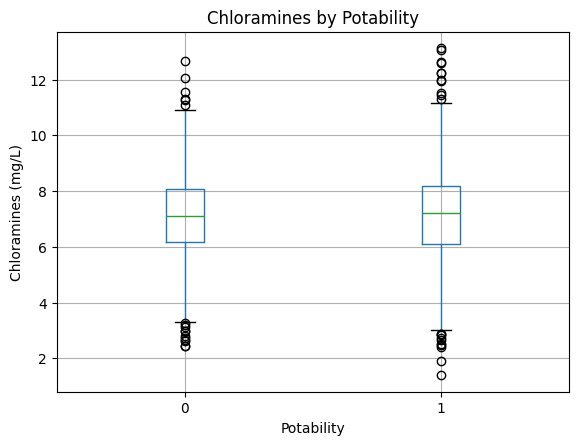

In [13]:
df.boxplot(column='Chloramines', by='Potability')
plt.title("Chloramines by Potability")
plt.suptitle("")
plt.xlabel("Potability")
plt.ylabel("Chloramines (mg/L)")
plt.show()


#### The Drinking Water Inspectorate in the UK require that the level should be no more that 5mg/l, the minimum level is 2mg/l.The boxplots above this clearly exceed this. This is alos inline with the WHO reccomendation. 

### Hypotheses 3

* Null Hypothesis (H₀): There is no difference in turbidity between potable and non-potable samples.

* Alternative Hypothesis (H₁): Potable water has lower turbidity on average than non-potable water.


In [14]:
turb_potable = df[df['Potability'] == 1]['Turbidity']
turb_non_potable = df[df['Potability'] == 0]['Turbidity']
print(stats.shapiro(turb_potable))
print(stats.shapiro(turb_non_potable))
t_stat, p_value = stats.ttest_ind(turb_potable, turb_non_potable, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_value)
if p_value < 0.05:
    print("Reject H₀: Lower turbidity is significantly associated with potability.")
else:
    print("Fail to reject H₀: No significant association found.")



ShapiroResult(statistic=0.9987315157461357, pvalue=0.8451280655706679)
ShapiroResult(statistic=0.9991946663600395, pvalue=0.8989376610200985)
t-statistic: 1.0185904427687968 p-value: 0.30853838311408666
Fail to reject H₀: No significant association found.


##### There is no significant difference in the the potable and non-potable samples.

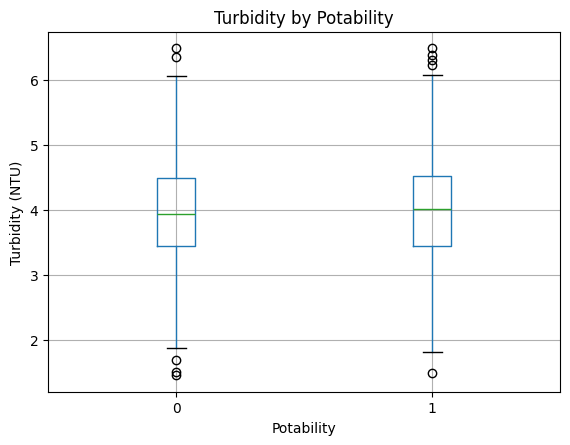

In [15]:
df.boxplot(column='Turbidity', by='Potability')
plt.title("Turbidity by Potability")
plt.suptitle("")
plt.xlabel("Potability")
plt.ylabel("Turbidity (NTU)")
plt.show()



#### The accepted World Health Organisation level of turbidity is 5.00 NTU, the meadian values are about 4.00 NTU. However, high turbidity levels can shield microorganisms from disinfection—but in this dataset, turbidity levels are similar regardless of whether water is potable.